# Objetivo 2.1

# Autores
David Rodríguez , Alejandro Meza

# Índice de la práctica

- [1.Introducción](#1.Introducción)
- [2.Creación de datos](#2.Creación-de-datos)
- [3.Creación de Modelo de Predicción](#3.Creación-de-Modelo-de-Predicción)

In [1]:
import cv2
import glob
import skimage


#Librerias contornos 
import numpy as np
from skimage.io import imread, imshow
import matplotlib.pyplot as plt
%matplotlib inline
from skimage.feature import hog
from skimage import data, exposure

#Machine Learning
from scipy.optimize import minimize
import sklearn.metrics as metrics
from sklearn.model_selection import GridSearchCV
from sklearn import svm

# 1.Introducción

Para cumplir el objetivo 1, lo hemos dividido en tareas:

||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

# 2.Creación de datos

Se va a crear la matriz X, que es la que contiene las imágenes (se crea un dataset). Creamos metodos que nos ayudaran a conseguir nuestro objetivo.

In [2]:
'''
Descripcion: diccionario con los posibles valores de las imagenes, en relacion con el nombre de las carpetas.
Entrada: -
Salida: diccionario cuyas claves son el nombre de las carpetas, y los valores son el tipo de signals que contiene.
'''
def devolverDiccionarioEtiquetasSign():
    
    diccionarioValores = {}
    diccionarioValores['00000'] = 'VelocidadMaxima20'
    diccionarioValores['00001'] = 'VelocidadMaxima30'
    diccionarioValores['00002'] = 'VelocidadMaxima50'
    diccionarioValores['00003'] = 'VelocidadMaxima60'
    diccionarioValores['00004'] = 'VelocidadMaxima70'
    diccionarioValores['00005'] = 'VelocidadMaxima80'
    diccionarioValores['00006'] = 'FinVelocidadMaxima80'
    diccionarioValores['00007'] = 'VelocidadMaxima100'
    diccionarioValores['00008'] = 'VelocidadMaxima120'
    diccionarioValores['00009'] = 'AdelantamientoProhibido'
    diccionarioValores['00010'] = 'AdelantamientoProhibidoParaCamiones'

    diccionarioValores['00011'] = 'InterseccionConPrioridad'
    diccionarioValores['00012'] = 'CalzadaConPrioridad'
    diccionarioValores['00013'] = 'CedaElPaso'
    diccionarioValores['00014'] = 'DetencionObligatoria'
    diccionarioValores['00015'] = 'CirculacionProhibida'
    diccionarioValores['00016'] = 'EntradaProhibidaAVehiculosMercancias'
    diccionarioValores['00017'] = 'EntradaProhibida'
    diccionarioValores['00018'] = 'OtrosPeligros'
    diccionarioValores['00019'] = 'CurvaPeligrosaHaciaLaIzquierda'
    diccionarioValores['00020'] = 'CurvaPeligrosaHaciaLaDerecha'

    diccionarioValores['00021'] = 'CurvasPeligrosasHaciaLaIzquierda'
    diccionarioValores['00022'] = 'PerfilIrregular'
    diccionarioValores['00023'] = 'PavimentoDeslizante'
    diccionarioValores['00024'] = 'EstrechamientoCalzadaPorDerecha'
    diccionarioValores['00025'] = 'Obras'
    diccionarioValores['00026'] = 'Semaforos'
    diccionarioValores['00027'] = 'PasoDePeatones'
    diccionarioValores['00028'] = 'Kids'
    diccionarioValores['00029'] = 'EntradaProhibidasCiclos'
    diccionarioValores['00030'] = 'PavimentoDeslizanteNieveHielo'

    diccionarioValores['00031'] = 'PasoDeAnimalesEnLibertad'
    diccionarioValores['00032'] = 'FinDeProhibiciones'
    diccionarioValores['00033'] = 'SentidoObligatorioDerecha'
    diccionarioValores['00034'] = 'SentidoObligatorioIzquierda'
    diccionarioValores['00035'] = 'SentidoObligatorio'
    diccionarioValores['00036'] = 'DirPermitidasRectoYDerecha'
    diccionarioValores['00037'] = 'DirPermitidasRectoEIzquierda'
    diccionarioValores['00038'] = 'PasoObligatorioDerecha'
    diccionarioValores['00039'] = 'PasoObligatorioizquierda'
    diccionarioValores['00040'] = 'InterseccionSentidoObligatorioGiratorio'


    diccionarioValores['00041'] = 'FinProhibicionAdelantamiento'
    diccionarioValores['00042'] = 'FinProhibicionAdelantamientoCamiones'
    
    return diccionarioValores

In [3]:
'''
Descripcion: diccionario con los posibles valores de las imagenes, en relacion con el nombre de las carpetas.
Entrada: -
Salida: diccionario cuyas claves son el nombre de las carpetas, y los valores son el tipo de signals que contiene.
'''
def devolverDiccionarioEtiquetasNoSign():
    
    diccionarioValores = {}
    diccionarioValores['000'] = 'Animal'
    diccionarioValores['001'] = 'Carretera'
    diccionarioValores['002'] = 'Cielo'
    diccionarioValores['003'] = 'VehiculoCoche'
    diccionarioValores['004'] = 'Arbol'
    diccionarioValores['005'] = 'Persona'
    diccionarioValores['006'] = 'Edificio'
    diccionarioValores['007'] = 'VehiculoMoto'
    diccionarioValores['008'] = 'Semaforo'
    diccionarioValores['009'] = 'Basura'
    diccionarioValores['010'] = 'Farola'

    diccionarioValores['011'] = 'Estatua'
    diccionarioValores['012'] = 'PasoDeZebra'
    diccionarioValores['013'] = 'Carteles'
    diccionarioValores['014'] = 'Ventana'
    diccionarioValores['015'] = 'Paisaje'
    
    return diccionarioValores

Probemos ahora el código....

In [4]:
d =  devolverDiccionarioEtiquetasNoSign()

for k,v in d.items():
    print(v)

Animal
Carretera
Cielo
VehiculoCoche
Arbol
Persona
Edificio
VehiculoMoto
Semaforo
Basura
Farola
Estatua
PasoDeZebra
Carteles
Ventana
Paisaje


Creamos un diccionario para almacenar todas las fotos, relacionadas a cada elemento diferente de señal

In [5]:
'''
Descripcion: diccionario con los posibles valores de las imagenes, en relacion con el nombre de las carpetas.
Entrada: -
Salida: diccionario cuyas claves son el nombre de las carpetas, y los valores son las imagenes de las signals
'''
def crearDiccionarioDatosSign():
    trafic_signals = {}
    #para cada tipo de señal creamos una lista con sus ejemplos, y se la asignamos a su etiqueta de nombre de carpeta
    for i in range(0,43):
        if i<10:
            folder = 'Dataset_traffic_sign/0000'+str(i)+'/*.png'
            tipo = '0000'+str(i)
        else:
            folder = 'Dataset_traffic_sign/000'+str(i)+'/*.png'
            tipo = '000'+str(i)
        
        images = [cv2.imread(file,0) for file in glob.glob(folder)]
        images_mod = [] 
        for im in images:
            #se aplica el resize
            images_mod.append(cv2.resize(im, (100, 100), interpolation = cv2.INTER_NEAREST))

        trafic_signals[tipo] = images_mod
    return trafic_signals

In [6]:
'''
Descripcion: diccionario con los posibles valores de las imagenes, en relacion con el nombre de las carpetas.
Entrada: -
Salida: diccionario cuyas claves son el nombre de las carpetas, y los valores los elementos que no son signals
'''
def crearDiccionarioDatosNoSign():
    noSignals = {} #diccionario para almacenar todo lo que no es sinal
    #para cada tipo de elemento que no es señal creamos una lista con sus ejemplos
    # y se la asignamos a su etiqueta de nombre de carpeta
    for i in range(0,16): #iteramos sobre el numero de carptas
        if i<10:
            folder = 'Dataset_no_traffic_sign/00'+str(i)+'/*.jpg'
            tipo = '00'+str(i)
        else:
            folder = 'Dataset_no_traffic_sign/0'+str(i)+'/*.jpg'
            tipo = '0'+str(i)

        images = [cv2.imread(file,0) for file in glob.glob(folder)]
        images_mod = [] 
        for im in images:
            #se aplica el resize
            images_mod.append(cv2.resize(im, (100, 100), interpolation = cv2.INTER_NEAREST))

        noSignals[tipo] = images_mod
    return noSignals

Creamos funciones para transformar imagenes en descriptores con HOG.

In [7]:
# HOG
def hogMaker(images00000_mod):
    fd, hog_image = hog(images00000_mod, orientations=8, pixels_per_cell=(16, 16),
                        cells_per_block=(1, 1), visualize=True)
    return fd

Cogemos las imagenes y las separamos en train y test, y decimos a que clase pertenecen*

In [8]:
'''
Descripcion: Obtencion de train y test a partir de un conjunto de imágenes
Entrada: trafic_signals, signals_types
Salida: imagenesTrain,imagenesTest,ytrain,ytest
'''
def separaTrainTest(trafic_signals,signals_types):
    imagenesTrain = None
    imagenesTest = None
    ytrain = None
    ytest = None
    
    for signal,images in trafic_signals.items():
        
        aux_y_train = []
        aux_y_test = []
        
        np_im = np.array(images)
        n_train = int(0.6*np_im.shape[0])
        n_test = np_im.shape[0]-n_train
        
        aux_train = np_im[:n_train]
        aux_test = np_im[n_train:]
        
        for i in range(n_train):
            aux_y_train.append(signals_types[signal])
        for i in range(n_test):
            aux_y_test.append(signals_types[signal])
        
        aux_y_train = np.array(aux_y_train).reshape(-1,1)
        aux_y_test = np.array(aux_y_test).reshape(-1,1)
        
        if imagenesTrain is None:
            imagenesTrain = aux_train
            ytrain = aux_y_train
            imagenesTest = aux_test
            ytest = aux_y_test
        else:
            imagenesTrain = np.concatenate((imagenesTrain,aux_train),axis=0)
            ytrain =  np.vstack((ytrain,aux_y_train))
            imagenesTest = np.concatenate((imagenesTest,aux_test),axis=0)
            ytest = np.vstack((ytest,aux_y_test))
        
    return imagenesTrain,imagenesTest,ytrain,ytest

Creamos las caracteristicas con los datos que nos den y sus tipos*

In [9]:

def creaMatrizCaracteristicas(imagenes,carac_type, y=None ):
    X = None
    if y is not None:
        y_nueva = []
        
    for i in range(imagenes.shape[0]):
        if carac_type=='hog':
            d = hogMaker(imagenes[i])
        else: #en caso de recibir un valor que no es valido
            try:
                raise ValueError
            except ValueError:
                print("valor incorrecto")
        
        if d is not None:
            if y is not None:
                y_nueva.append(y[i])
            if X is None:
                X = d
            else:
                X = np.vstack((X,d))
    if y is not None:
        return X, np.array(y_nueva)
    else:
        return X

In [10]:
elem_signals = crearDiccionarioDatosSign() #creacion del diccionario de datos
signals_types = devolverDiccionarioEtiquetasSign() #creacion de diccionario que contiene nombre de carpetas y tipos de signals

elem_no_signals = crearDiccionarioDatosNoSign() #creacion del diccionario de datos
no_signals_types = devolverDiccionarioEtiquetasNoSign() #creacion de diccionario que contiene nombre de carpetas y tipos de signalcarac_type = 'hog' #el tipo elegido para los descriptores va a ser Hog
carac_type = 'hog'

Separamos las señales y las no señales en conjuntos para TRAIN y TEST

In [11]:
signal_Train,signal_Test,signal_ytrain,signal_ytest = separaTrainTest(elem_signals,signals_types)

In [12]:
no_signal_Train,no_signal_Test,no_signal_ytrain,no_signal_ytest = separaTrainTest(elem_no_signals,no_signals_types)

In [13]:
imagenesTrain = np.concatenate((signal_Train, no_signal_Train))
imagenesTest = np.concatenate((signal_Test, no_signal_Test))

ytrain = np.vstack((signal_ytrain,no_signal_ytrain))
ytest = np.vstack((signal_ytest,no_signal_ytest))

Xtrain, Ytrain = creaMatrizCaracteristicas(imagenesTrain,carac_type,ytrain)
Xtest, Ytest = creaMatrizCaracteristicas(imagenesTest,carac_type,ytest)

In [14]:
signal_Train.shape,signal_Test.shape,signal_ytrain.shape,signal_ytest.shape

((739, 100, 100), (525, 100, 100), (739, 1), (525, 1))

In [15]:
no_signal_Train.shape,no_signal_Test.shape,no_signal_ytrain.shape,no_signal_ytest.shape

((378, 100, 100), (262, 100, 100), (378, 1), (262, 1))

In [16]:
Xtrain.shape, Ytrain.shape,Xtest.shape, Ytest.shape

((1117, 288), (1117, 1), (787, 288), (787, 1))

# 3.Creación de Modelo de Predicción

A continuación se implementarán dos modelos de ML como son regresión logísitica y SVM para dar solución al problema.

In [17]:
def transformarY_SignNoSign(y, dicNoSign):
    Y = np.ones(y.shape[0]).reshape(-1,1)
    
    for signal,nombre in dicNoSign.items():
        for i in range(Y.size):
            if y[i]==nombre:
                Y[i] = 0
    Yfinal = []
    for i in range(Y.size):
        if Y[i] == 1:
            Yfinal.append('Signal')
        else:
            Yfinal.append('No Signal')
    return Yfinal

In [18]:
Ytrain_T = transformarY_SignNoSign(Ytrain, no_signals_types)
Ytest_T = transformarY_SignNoSign(Ytest, no_signals_types)

In [19]:
Ytrain_T = np.array(Ytrain_T)
Ytest_T = np.array(Ytest_T)

In [20]:
param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},]
svc = svm.SVC()
clf = GridSearchCV(svc, param_grid)
clf.fit(Xtrain,Ytrain_T.ravel())
y_pred = clf.predict(Xtest)
print("Classification report for - \n{}:\n{}\n".format(clf, metrics.classification_report(Ytest_T.ravel(), y_pred)))

Classification report for - 
GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}]):
              precision    recall  f1-score   support

   No Signal       0.92      0.92      0.92       262
      Signal       0.96      0.96      0.96       525

    accuracy                           0.95       787
   macro avg       0.94      0.94      0.94       787
weighted avg       0.95      0.95      0.95       787




In [21]:
def predecirImagenSVM(imagen,carac_type,clf):
#     transformar imagen en des
    d = creaMatrizCaracteristicas(np.array([imagen]), carac_type)
    d = np.array(d).reshape(1,-1)
    return clf.predict(d)

¿Desea probar el clasificador? (si/no)si
Introduce un numero de imagen para probar: 200
Tu numero de imagen para probar es la numero 200


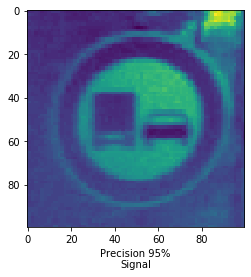

Precision hasta el momento: 100.0%

¿Desea seguir probando el clasificador? (si/no)si
Introduce un numero de imagen para probar: 500
Tu numero de imagen para probar es la numero 500


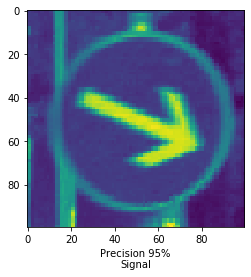

Precision hasta el momento: 100.0%

¿Desea seguir probando el clasificador? (si/no)si
Introduce un numero de imagen para probar: 600
Tu numero de imagen para probar es la numero 600


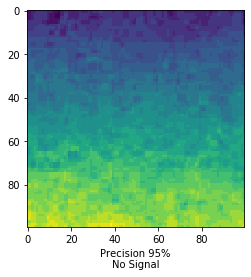

Precision hasta el momento: 100.0%

¿Desea seguir probando el clasificador? (si/no)no
Hasta la proxima!!


In [22]:
#pequeña celda para interactuar con el clasificador

caracter = input("¿Desea probar el clasificador? (si/no)")
nDeAciertos = 0
nDeSignalsEjecutadas = 0
if caracter == "no":
    print("Hasta la proxima!!")
elif caracter == "si":
    while(caracter == "si"):
        nDeSignalsEjecutadas+=1
        numeroImagen = (int)(input("Introduce un numero de imagen para probar: "))
        print(f"Tu numero de imagen para probar es la numero {numeroImagen}")
        res = predecirImagenSVM(imagenesTest[numeroImagen],carac_type,clf)
        plt.figure()
        plt.imshow(imagenesTest[numeroImagen])
        lab = 'Precision 95%\n'+ res[0]
        plt.xlabel(lab)
        plt.show()
        if Ytest_T[numeroImagen]==res:
            nDeAciertos+=1
        print(f"Precision hasta el momento: {(nDeAciertos/nDeSignalsEjecutadas)*100}%\n")
        caracter = input("¿Desea seguir probando el clasificador? (si/no)")
        if caracter == "no":
            print("Hasta la proxima!!")
            break

Para finalizar, vemos que tenemmos una gran tasa de aciertos, para predecir entre señales y no señales.

# Objetivo 2.2

In [23]:
import argparse
import time
import cv2

from skimage.transform.pyramids import pyramid_gaussian

In [24]:
def sliding_window(image, entreVentanas, windowSize):
    # slide a window across the image
    for j in range(0, image.shape[0], entreVentanas):
        for i in range(0, image.shape[1], entreVentanas):
            # yield the current window
            yield (i, j, image[j:j + windowSize[1], i:i + windowSize[0]])

In [25]:
a = cv2.imread('00002.jpg',0)
a.shape

(800, 1360)

Con Pyramid

In [ ]:
winW = 30
winH = 30
res = None
result = []
out = 0
for (i, resized) in enumerate(pyramid_gaussian(a, downscale=2,sigma=1)):
    
    # if the image is too small, break from the loop
    if resized.shape[0] < 30 or resized.shape[1] < 30:
        break
    # loop over the sliding window for each layer of the pyramid
    for (x, y, window) in sliding_window(resized, 10, windowSize=(winW, winH)):
#         print(x+winW,y+winH)
        clone = resized.copy()
        if x+winW>resized.shape[1] or y+winH>resized.shape[0]:
            out+=1
        else:
            res = predecirImagenSVM(cv2.resize(window, (100, 100), interpolation = cv2.INTER_NEAREST),carac_type,clf)
            if res=='Signal':
                cv2.rectangle(clone, (x, y), (x + winW, y + winH), (0, 255, 0), 2)
                cv2.imshow("Window", clone)
                cv2.waitKey(0)
                result.append((x,y,resized))
#             cv2.rectangle(clone, (x, y), (x + winW, y + winH), (0, 255, 0), 2)
#             cv2.imshow("Window", clone)
#             cv2.waitKey(1)
#             time.sleep(0.005)
    cv2.destroyAllWindows()
print(out)

In [ ]:
len(result)

Modificando el windows size

In [26]:
if a.shape[0]<a.shape[1]:
    winH = int(a.shape[0])
else:
    winH = int(a.shape[1])
winW = winH
step = int(winW/2)
print(winW,winH,step)
result = []
while winW>30 and winH>30:
    # loop over the sliding window for each layer of the pyramid
    for (x, y, window) in sliding_window(a, step, windowSize=(winW, winH)):
        # if the window does not meet our desired window size, ignore it
        if x+winW>a.shape[1] or y+winH>a.shape[0]:
            print('F')
        else:
            res = predecirImagenSVM(cv2.resize(window, (100, 100), interpolation = cv2.INTER_NEAREST),carac_type,clf)
            clone = a.copy()
            cv2.rectangle(clone, (x, y), (x + winW, y + winH), (0, 255, 0), 2)
            cv2.imshow("Window", clone)
            if res=='Signal':
#                 cv2.waitKey(0)
                result.append((x,y,winW,winH))
            else:
                cv2.waitKey(1)
                time.sleep(0.005)
    cv2.destroyAllWindows()
    winW = int(winW/1.5)
    winH = winW
    step = int(winW/2)
    print(winW,winH)

800 800 400
F
F
F
F
F
F
533 533
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
355 355
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
236 236
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
157 157
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
104 104
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
69 69
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
46 46
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F


Aplicar SVM

In [ ]:
winW = 30
winH = 30
for (i, resized) in enumerate(pyramid_gaussian(imagenesTrain[0], downscale=2,sigma=1)):
    
    # if the image is too small, break from the loop
    if resized.shape[0] < 30 or resized.shape[1] < 30:
        break
    
    # loop over the sliding window for each layer of the pyramid
    for (x, y, window) in sliding_window(resized, 10, windowSize=(winW, winH)):
        # if the window does not meet our desired window size, ignore it
        if window.shape[0] != winH or window.shape[1] != winW:
            continue
        res = predecirImagenSVM(window,carac_type,clf)
        if res=='Signal':
            cv2.waitKey(0)
        clone = resized.copy()
        cv2.rectangle(clone, (x, y), (x + winW, y + winH), (0, 255, 0), 2)
        cv2.imshow("Window", clone)
        cv2.waitKey(1)
        time.sleep(0.025)
    cv2.destroyAllWindows()

In [28]:
clone = a.copy()
for i in range(len(result)):
    x,y,winW,winH = result[i]
    cv2.rectangle(clone, (x, y), (x + winW, y + winH), (0, 255, 0), 2)
    cv2.imshow("Window", clone)
    cv2.waitKey(0)
cv2.destroyAllWindows()